In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random



In [73]:
def plot_value_estimates(v_history, ph):
    """
    绘制价值函数随迭代次数变化的图。

    Args:
        v_history (dict): 存储每次迭代价值函数字典的字典。
                         键是迭代次数，值是对应的v_table。
        ph (float): 正面朝上的概率。
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # 获取所有存储的迭代次数，并进行排序
    iterations_to_plot = sorted(v_history.keys())

    # 创建标签。我们将最后一次迭代标记为“Final value function”
    labels = [f'sweep {i}' for i in iterations_to_plot]
    
    # 定义绘图颜色
    colors = ['blue', 'green', 'red', 'orange', 'black']
    if len(iterations_to_plot) > len(colors):
        # 如果迭代次数超过预设颜色，可以添加更多颜色或循环使用
        colors = plt.cm.viridis(np.linspace(0, 1, len(iterations_to_plot)))
    
    x_axis = np.arange(1, 100)
    
    for i, iteration in enumerate(iterations_to_plot):
        v_dict = v_history[iteration]
        v_values = [v_dict[j] for j in x_axis]
        ax.plot(x_axis, v_values, color=colors[i], label=labels[i])
        
    ax.set_title(f'Value function estimates for $p_h = {ph}$', fontsize=16)
    ax.set_xlabel('Capital', fontsize=12)
    ax.set_ylabel('Value estimates', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)
    ax.set_ylim(0, 1.0)
    
    # 标注最终价值函数
    ax.annotate(
        'Final value function',
        xy=(80, 0.9), xycoords='data',
        xytext=(30, 0.8), textcoords='data',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
        fontsize=12
    )
    plt.show()


def plot_final_policy(policy, ph):
    """
    绘制最终策略的图。
    
    Args:
        policy (dict): 最终策略的字典。
        ph (float): 正面朝上的概率。
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    x_axis = np.arange(1, 100)
    # 从字典中提取出1到99的键值对，并按键排序
    y_axis = [policy[i] for i in x_axis]
    
    ax.step(x_axis, y_axis, where='post')
    
    ax.set_title(f'Optimal Policy for $p_h = {ph}$', fontsize=16)
    ax.set_xlabel('Capital', fontsize=12)
    ax.set_ylabel('Final policy (stake)', fontsize=12)
    ax.grid(True, axis='y')
    ax.set_xticks(np.arange(0, 100, 25))
    
    plt.show()


In [147]:
class Agent:
    def __init__(self, ph):
        self.goal = 100
        self.v_table = {i: 0.0 for i in range(101)}
        self.policy = {i: -1 for i in range(101)}
        self.theta = 1e-9
        self.gamma = 1.0

        self.ph = ph
        self.pt = 1 - self.ph
        self.v_history = {}  # 用于存储每次迭代的v_table字典

    def value_iteration(self):
        iteration_count = 0
        while True:
            if iteration_count in [1, 2, 3, 32]:
                self.v_history[iteration_count] = self.v_table.copy()
            iteration_count += 1
            print(f"Starting {iteration_count} iteration.")
            
            v_table_new = self.v_table.copy()
            delta = 0.0
            for state in range(1, self.goal):
                v_state = self.v_table[state]
                q_table = {}
                for action in range(1, min(state, self.goal - state) + 1):
                    temp_action_value = 0.0
                    for result in ('head', 'tail'):
                        if result == 'head':
                            prob = self.ph
                            next_state = state + action
                            if next_state == self.goal:
                                reward = 1.0
                            else:
                                reward = 0.0
                        else:
                            prob = self.pt
                            next_state = state - action
                            reward = 0.0
                        temp_action_value += prob * (reward + self.gamma * self.v_table[next_state])
                    q_table[action] = temp_action_value
                    
                v_table_new[state] = max(q_table.values())
                # max_actions = [k for k, v in q_table.items() if v == max(q_table.values())]

                delta = max(delta, abs(v_state - v_table_new[state]))
            self.v_table = v_table_new
            if delta < self.theta:
                break
        self.v_history[iteration_count] = self.v_table.copy()
        print('Value iteration finished.')

    def extract_policy(self):
        """
        Extracts the optimal policy from the converged value function.
        """
        for state in range(1, self.goal):
            action_returns = []
            actions = np.arange(min(state, self.goal - state) + 1)
            for action in actions:
                temp_action_value = 0.0
                for result in ('head', 'tail'):
                    if result == 'head':
                        prob = self.ph
                        next_state = state + action
                        if next_state == self.goal:
                            reward = 1.0
                        else:
                            reward = 0.0
                    else:
                        prob = self.pt
                        next_state = state - action
                        reward = 0.0
                    temp_action_value += prob * (reward + self.gamma * self.v_table[next_state])
                action_returns.append(temp_action_value)
                
            # max_actions = [v for k, v in q_table.items() if v == max(q_table.values())]
            self.policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

        

Starting 1 iteration.
Starting 2 iteration.
Starting 3 iteration.
Starting 4 iteration.
Starting 5 iteration.
Starting 6 iteration.
Starting 7 iteration.
Starting 8 iteration.
Starting 9 iteration.
Starting 10 iteration.
Starting 11 iteration.
Starting 12 iteration.
Starting 13 iteration.
Starting 14 iteration.
Starting 15 iteration.
Starting 16 iteration.
Starting 17 iteration.
Starting 18 iteration.
Starting 19 iteration.
Starting 20 iteration.
Starting 21 iteration.
Starting 22 iteration.
Starting 23 iteration.
Starting 24 iteration.
Starting 25 iteration.
Starting 26 iteration.
Starting 27 iteration.
Starting 28 iteration.
Starting 29 iteration.
Starting 30 iteration.
Starting 31 iteration.
Value iteration finished.


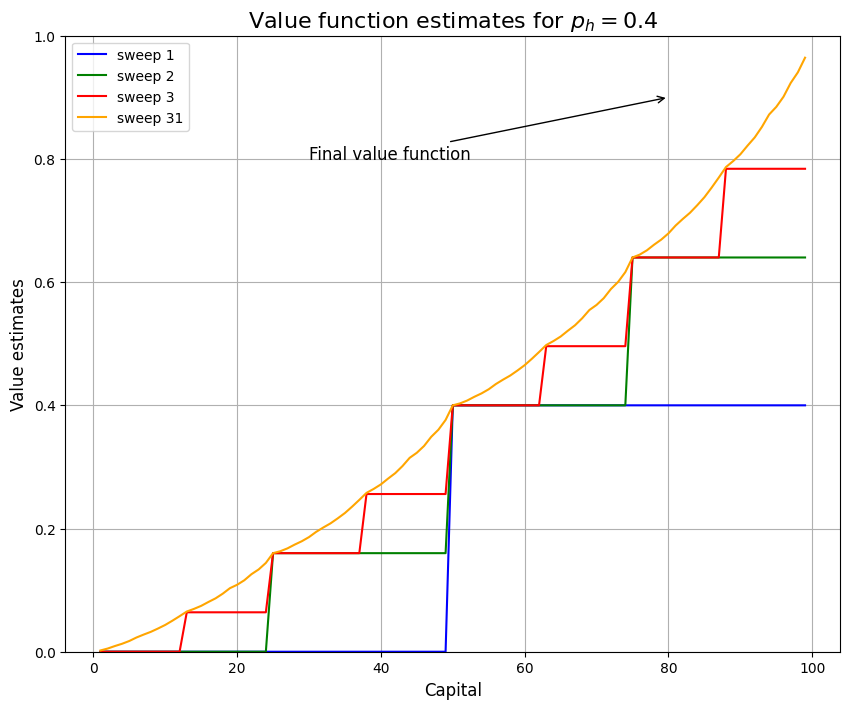

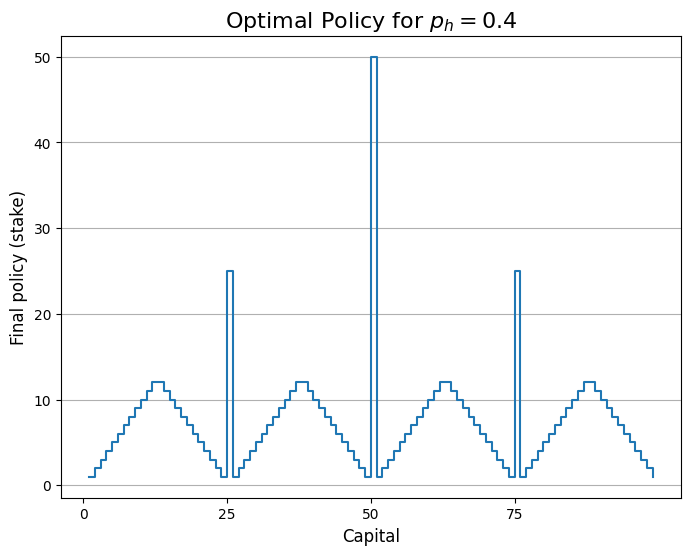

In [148]:
agent = Agent(0.4)
agent.value_iteration()
agent.extract_policy()
plot_value_estimates(agent.v_history, agent.ph)
plot_final_policy(agent.policy, agent.ph)


Starting 1 iteration.
Starting 2 iteration.
Starting 3 iteration.
Starting 4 iteration.
Starting 5 iteration.
Starting 6 iteration.
Starting 7 iteration.
Starting 8 iteration.
Starting 9 iteration.
Starting 10 iteration.
Starting 11 iteration.
Starting 12 iteration.
Starting 13 iteration.
Starting 14 iteration.
Starting 15 iteration.
Starting 16 iteration.
Starting 17 iteration.
Starting 18 iteration.
Starting 19 iteration.
Starting 20 iteration.
Starting 21 iteration.
Starting 22 iteration.
Starting 23 iteration.
Starting 24 iteration.
Starting 25 iteration.
Starting 26 iteration.
Starting 27 iteration.
Value iteration finished.


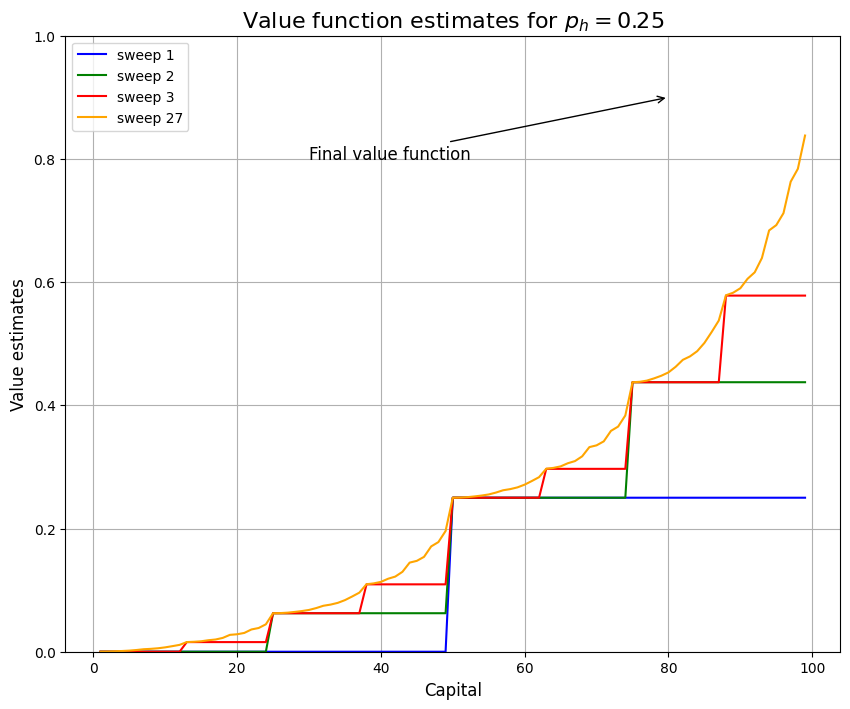

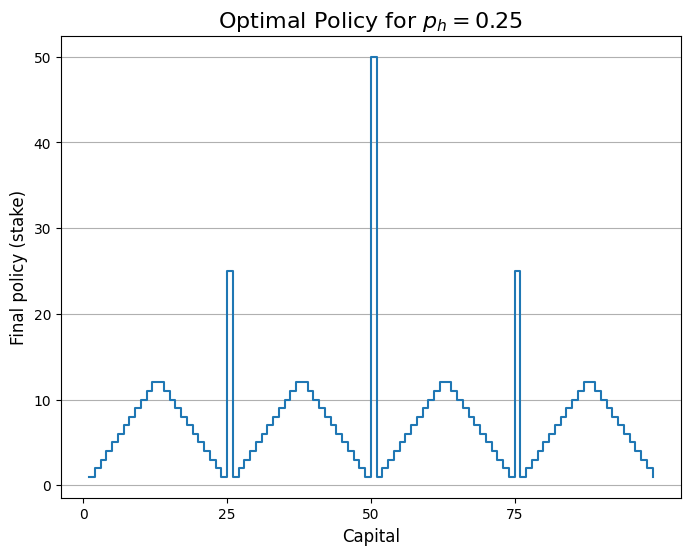

In [149]:
agent = Agent(0.25)
agent.value_iteration()
agent.extract_policy()
plot_value_estimates(agent.v_history, agent.ph)
plot_final_policy(agent.policy, agent.ph)

Starting 1 iteration.
Starting 2 iteration.
Starting 3 iteration.
Starting 4 iteration.
Starting 5 iteration.
Starting 6 iteration.
Starting 7 iteration.
Starting 8 iteration.
Starting 9 iteration.
Starting 10 iteration.
Starting 11 iteration.
Starting 12 iteration.
Starting 13 iteration.
Starting 14 iteration.
Starting 15 iteration.
Starting 16 iteration.
Starting 17 iteration.
Starting 18 iteration.
Starting 19 iteration.
Starting 20 iteration.
Starting 21 iteration.
Starting 22 iteration.
Starting 23 iteration.
Starting 24 iteration.
Starting 25 iteration.
Starting 26 iteration.
Starting 27 iteration.
Starting 28 iteration.
Starting 29 iteration.
Starting 30 iteration.
Starting 31 iteration.
Starting 32 iteration.
Starting 33 iteration.
Starting 34 iteration.
Starting 35 iteration.
Starting 36 iteration.
Starting 37 iteration.
Starting 38 iteration.
Starting 39 iteration.
Starting 40 iteration.
Starting 41 iteration.
Starting 42 iteration.
Starting 43 iteration.
Starting 44 iteratio

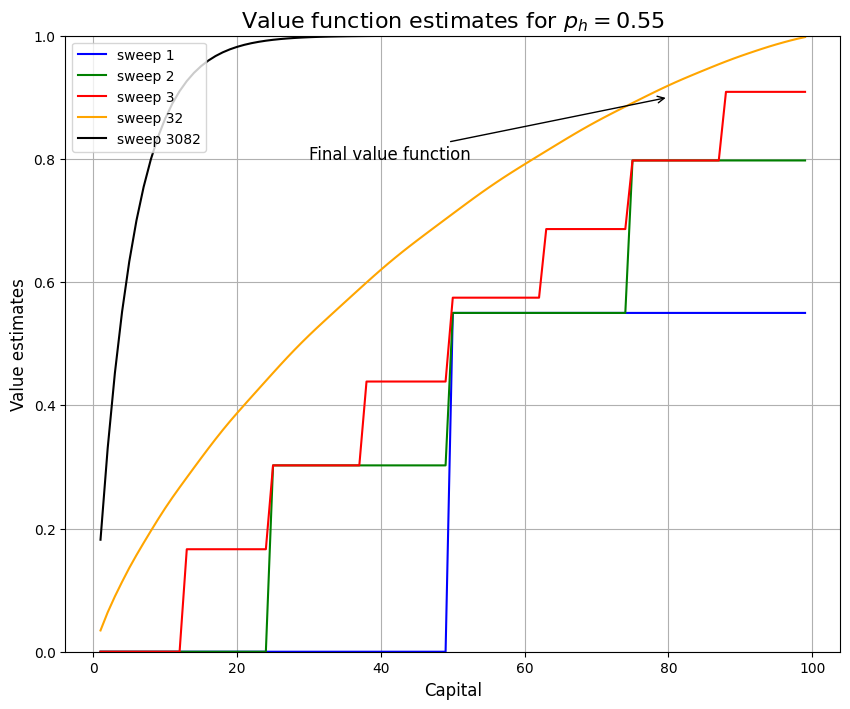

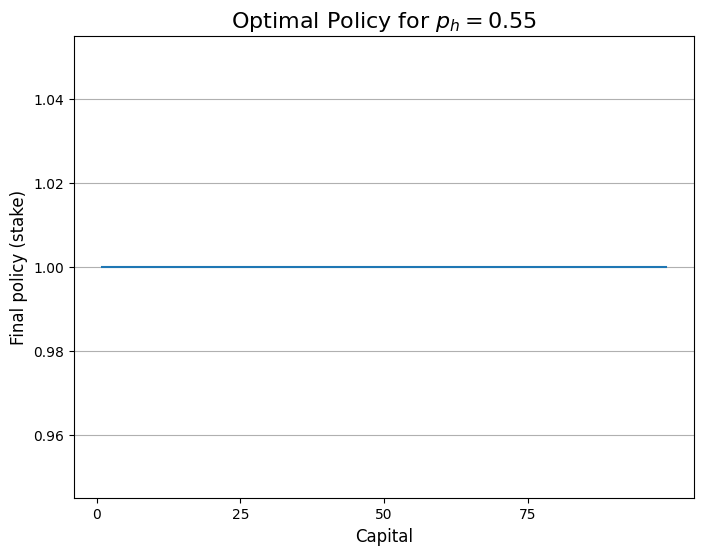

In [150]:
agent = Agent(0.55)
agent.value_iteration()
agent.extract_policy()
plot_value_estimates(agent.v_history, agent.ph)
plot_final_policy(agent.policy, agent.ph)